In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [6]:
df = pd.read_csv("..\\data\\raw\\cicids2017_cleaned.csv")

In [7]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Max,Active Min,Idle Mean,Idle Max,Idle Min,Attack Type
0,22,1266342,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
1,22,1319353,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
2,22,160,1,0,0,0,0.000000,0.000000,0,0,...,243,0,32,0.0,0,0,0.0,0,0,Normal Traffic
3,22,1303488,41,2728,456,0,66.536585,110.129945,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
4,35396,77,1,0,0,0,0.000000,0.000000,0,0,...,290,0,32,0.0,0,0,0.0,0,0,Normal Traffic


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520751 entries, 0 to 2520750
Data columns (total 53 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Length of Fwd Packets  int64  
 4   Fwd Packet Length Max        int64  
 5   Fwd Packet Length Min        int64  
 6   Fwd Packet Length Mean       float64
 7   Fwd Packet Length Std        float64
 8   Bwd Packet Length Max        int64  
 9   Bwd Packet Length Min        int64  
 10  Bwd Packet Length Mean       float64
 11  Bwd Packet Length Std        float64
 12  Flow Bytes/s                 float64
 13  Flow Packets/s               float64
 14  Flow IAT Mean                float64
 15  Flow IAT Std                 float64
 16  Flow IAT Max                 int64  
 17  Flow IAT Min                 int64  
 18  Fwd IAT Total                int64  
 19  

In [5]:
df.isna().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Length of Fwd Packets    0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max                    0
Fwd IAT Min                    0
Bwd IAT Total                  0
Bwd IAT Mean                   0
Bwd IAT Std                    0
Bwd IAT Max                    0
Bwd IAT Min                    0
Fwd Header Length              0
Bwd Header Length              0
Fwd Packet

Attack Type
Normal Traffic    2095057
DoS                193745
DDoS               128014
Port Scanning       90694
Brute Force          9150
Web Attacks          2143
Bots                 1948
Name: count, dtype: int64


C:\Users\ishaa\AppData\Local\Temp\ipykernel_23212\956607838.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


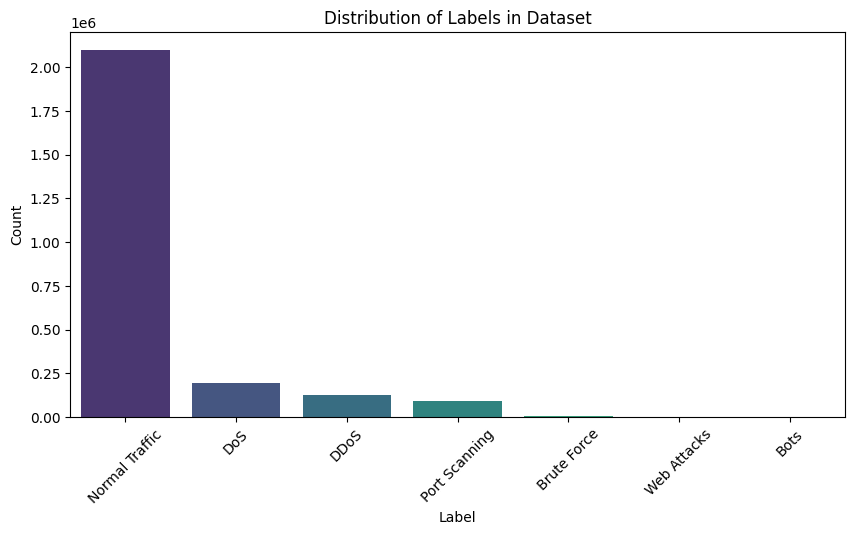

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique labels
label_counts = df['Attack Type'].value_counts()

print(label_counts)

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels in Dataset")
plt.xticks(rotation=45)  # Rotate labels for better visibility if needed
plt.show()

In [7]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming df is your original dataframe
X = df.drop(columns=['Attack Type'], axis=1)
y = df['Attack Type']

# Step 1: Reduce Normal Traffic (undersample to 1,000,000)
undersample = RandomUnderSampler(sampling_strategy={'Normal Traffic': 1000000})  
X_under, y_under = undersample.fit_resample(X, y)

# Step 2: Oversample attack types using SMOTE
smote = SMOTE(sampling_strategy='auto')

X_resampled, y_resampled = smote.fit_resample(X_under, y_under)

# Check new distribution
print(y_resampled.value_counts())


Attack Type
Bots              1000000
Brute Force       1000000
DDoS              1000000
DoS               1000000
Normal Traffic    1000000
Port Scanning     1000000
Web Attacks       1000000
Name: count, dtype: int64


In [8]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Max,Active Min,Idle Mean,Idle Max,Idle Min,Attack Type
0,22,1266342,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
1,22,1319353,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
2,22,160,1,0,0,0,0.000000,0.000000,0,0,...,243,0,32,0.0,0,0,0.0,0,0,Normal Traffic
3,22,1303488,41,2728,456,0,66.536585,110.129945,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
4,35396,77,1,0,0,0,0.000000,0.000000,0,0,...,290,0,32,0.0,0,0,0.0,0,0,Normal Traffic


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [11]:
feature_importance = abs(pca.components_).sum(axis=0)
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df.sort_values(by='Importance', ascending=True, inplace=True)

In [12]:
feature_importance_df.head()

,Feature,Importance
45,min_seg_size_forward,0.788201
33,Max Packet Length,0.931405
19,Fwd IAT Mean,1.023561
35,Packet Length Std,1.028877
34,Packet Length Mean,1.072591


In [13]:
dfs = {}
remove_counts = [0, 5, 10, 15, 20]

for count in remove_counts:
    features_to_remove = feature_importance_df.head(count)['Feature'].tolist()
    selected_features = [col for col in X.columns if col not in features_to_remove]

    # Create dataframe with selected features
    df_selected = df[selected_features + ['Attack Type']]
    dfs[f'Dataset_{count}_removed'] = df_selected

In [14]:
dfs['Dataset_0_removed'].head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Max,Active Min,Idle Mean,Idle Max,Idle Min,Attack Type
0,22,1266342,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
1,22,1319353,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
2,22,160,1,0,0,0,0.000000,0.000000,0,0,...,243,0,32,0.0,0,0,0.0,0,0,Normal Traffic
3,22,1303488,41,2728,456,0,66.536585,110.129945,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
4,35396,77,1,0,0,0,0.000000,0.000000,0,0,...,290,0,32,0.0,0,0,0.0,0,0,Normal Traffic


In [15]:
dfs['Dataset_5_removed'].head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,Active Mean,Active Max,Active Min,Idle Mean,Idle Max,Idle Min,Attack Type
0,22,1266342,41,2664,456,0,64.975610,109.864573,976,0,...,29200,243,24,0.0,0,0,0.0,0,0,Normal Traffic
1,22,1319353,41,2664,456,0,64.975610,109.864573,976,0,...,29200,243,24,0.0,0,0,0.0,0,0,Normal Traffic
2,22,160,1,0,0,0,0.000000,0.000000,0,0,...,290,243,0,0.0,0,0,0.0,0,0,Normal Traffic
3,22,1303488,41,2728,456,0,66.536585,110.129945,976,0,...,29200,243,24,0.0,0,0,0.0,0,0,Normal Traffic
4,35396,77,1,0,0,0,0.000000,0.000000,0,0,...,243,290,0,0.0,0,0,0.0,0,0,Normal Traffic


In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Flatten
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score

# Load Dataset_0_removed
df = dfs['Dataset_0_removed']

# Separate features and labels
X = df.drop(columns=['Attack Type']).values  
y = df['Attack Type'].values  

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape input for CNN
X = np.expand_dims(X, axis=2)  # Shape -> (samples, features, 1)

# Define Complex CNN + BiLSTM Model
model = Sequential([
    # CNN Feature Extractor
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    # BiLSTM Layers
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(64)),

    # Dense Layers
    Dense(128, activation='relu'),
    Dropout(0.4),

    # Output Layer
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.0005),  # Reduced LR for stability
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train Model (Dataset_0_removed only)
history = model.fit(X, y, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate Model
y_pred = np.argmax(model.predict(X), axis=1)
acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='weighted')

# Print Results
print(f'Accuracy: {acc:.4f}')
print(f'F1 Score: {f1:.4f}')


Epoch 1/5
31510/31510 [==============================] - 574s 18ms/step - loss: 0.0418 - accuracy: 0.9821 - val_loss: 0.2001 - val_accuracy: 0.9515
Epoch 2/5
31510/31510 [==============================] - 551s 17ms/step - loss: 0.0328 - accuracy: 0.9848 - val_loss: 0.1180 - val_accuracy: 0.9649
Epoch 3/5
31510/31510 [==============================] - 565s 18ms/step - loss: 0.0314 - accuracy: 0.9852 - val_loss: 0.1881 - val_accuracy: 0.9504
Epoch 4/5
31510/31510 [==============================] - 576s 18ms/step - loss: 0.0308 - accuracy: 0.9855 - val_loss: 0.2904 - val_accuracy: 0.9463
Epoch 5/5
78774/78774 [==============================] - 483s 6ms/step
Accuracy: 0.9818
F1 Score: 0.9813


In [18]:
model.save("first.h5")

In [20]:
# Separate features and labels
X_original = df.drop(columns=['Attack Type']).values  
y_original = df['Attack Type'].values  

# Encode labels (use the same encoder from training)
y_original = label_encoder.transform(y_original)  # Ensure consistency

# Normalize features (use the same scaler from training)
X_original = scaler.transform(X_original)

# Reshape input for CNN
X_original = np.expand_dims(X_original, axis=2)  # Shape -> (samples, features, 1)

# Make predictions
y_original_pred = np.argmax(model.predict(X_original), axis=1)

# Evaluate performance
original_acc = accuracy_score(y_original, y_original_pred)
original_f1 = f1_score(y_original, y_original_pred, average='weighted')

# Print results
print(f'Original Dataset (No SMOTE) Accuracy: {original_acc:.4f}')
print(f'Original Dataset (No SMOTE) F1 Score: {original_f1:.4f}')


78774/78774 [==============================] - 441s 6ms/step
Original Dataset (No SMOTE) Accuracy: 0.9818
Original Dataset (No SMOTE) F1 Score: 0.9813
